# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [34]:
# Add your imports here
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [35]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [51]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [52]:
# Write your code here
colors = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip', compression='zip').copy()
inventories = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip', compression='zip').copy()
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip', compression='zip').copy()
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip', compression='zip').copy()
part_categories = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip', compression='zip').copy()
parts = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip', compression='zip').copy()
sets = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip', compression='zip').copy()
themes = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip', compression='zip').copy()


### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [53]:
# Write your code here
#1: sets: year
years = sets['year']
nb_year = len(years)

#Helper function to check if a string represents a number (instead of isdigit, which fails on negative numbers)
def isInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
    

#Our check function: we want years to be non-null numbers between 1932 (the year lego was founded) and this year
def check_years(years):
    this_year = int(datetime.now().year)
    min_year = this_year
    max_year = this_year
    checks_out = True
    for year in years:
        #Check for non-string types, which could cause problems with parsing
        if not type(year) is str:
            print('FAILURE: ' + str(year) + ' is not of type string (type: ' + str(type(year)) +')')
            checks_out = False
        #Check for non-null values
        elif year is None:
            print('FAILURE: Null value found')
            checks_out = False
        #Check for string that do not represent integers
        elif not isInt(year):
            print('FAILURE: ' + str(year) + ' does not represent an integer')
            checks_out = False
        else:
            int_year = int(year)
            
            #range updates
            if int_year < min_year:
                min_year = int_year
            if int_year > max_year:
                max_year = int_year
            
            #Check year does not predate lego
            if int_year < 1932:
                print('FAILURE: Year ' + str(year) + ' is before 1932, the year lego was founded, which is inconsistent')
                checks_out = False
            #Check year is not in the future
            elif this_year < int_year:
                print('FAILURE: Year ' + str(year) + ' is in the future, which is inconsistent' )
                checks_out = False

    print('Final verdict: Checks passed? ' + str(checks_out))
    print('Range of years: ' + str(min_year) + ' - ' + str(max_year))
    return checks_out

#element type
check_years(years)


FAILURE: 70s does not represent an integer
FAILURE: Year 19788 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego wa

False

In [54]:
#we notice multiple years represented as 'x0s', which we will interpret as and convert to the year '19x0'
def convert_decades_to_years(years_to_convert):
    nb_years = len(years_to_convert)
    for i in range(nb_years):
        year = years_to_convert[i]
        if not isInt(year):
            if type(year) is str and year[2] == 's':
                decade = year[0]
                years_to_convert[i] = '19' + str(decade) + '0'
            else:
                #Other, unknown string case we did not handle yet
                raise Exception('Unknown non-integer year value: ' + str(year) + ' --> Update your cleaning function')
        
convert_decades_to_years(years)
check_years(years)
        

FAILURE: Year 19788 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2003 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Year -2002 is before 1932, the year lego was founded, which is inconsistent
FAILURE: Y

False

In [55]:
#We notice many negative years, such as -2003, so we will simply return their positive value
def make_years_positive(years_to_convert):
    nb_years = len(years_to_convert)
    for i in range(nb_years):
        year = years_to_convert[i]
        if not isInt(year):
            raise Exception('Year ' + year + ' does not represent an integer')
        else:
            year_int = int(year)
            if year_int < 0:
                positive_year = str(-year_int)
                years_to_convert[i] = positive_year
    
    
make_years_positive(years)
check_years(years)


FAILURE: Year 19788 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20022 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, which is inconsistent
FAILURE: Year 20044 is in the future, which is inconsistent
FAILURE: Year 20044 is in the future, which is inconsistent
FAILURE: Year 20011 is in the future, which is inconsistent
FAILURE: Year 20033 is in the future, wh

False

In [56]:
#We notice many years have five digits, including a repeated pair at the end, like a typo, so we remove this last digit
def make_years_four_digits(years_to_convert):
    nb_years = len(years_to_convert)
    for i in range(nb_years):
        year = years_to_convert[i]
        if len(year) > 4:
            #Remove last digit
            years_to_convert[i] = year[:-1]
            
    
make_years_four_digits(years)
check_years(years)

Final verdict: Checks passed? True
Range of years: 1950 - 2018


True

In [57]:
#inventory parts: quantity
quantities = inventory_parts['quantity']

#check function to find inconsistenties
def check_quantities(quantities_to_check):
    checks_out = True
    for quantity in quantities_to_check:
        #quantities should be numbers
        if not type(quantity) is float:
            print('FAILURE: ' + str(quantity) + ' is not of type float (type: ' + str(type(year)) +')')
            checks_out = False
        #check for null values
        elif quantity is None:
            print('FAILURE: null value')
            checks_out = False
        #it makes no sense to have negative quantities
        elif quantity < 0.0:
            print('FAILURE: ' + str(quantity) + ' is negative')
            checks_out = False
            
    print('Final verdict: Checks passed? ' + str(checks_out))
    print('Average number of parts: ' + str(quantities_to_check.mean()))
    return checks_out

check_quantities(quantities)

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -inf is negative
FAILURE: -in

False

In [59]:
#We see that some values are negative, which makes no sense (negative quantities!). We will set these values to 0
def make_negative_zero(quantities_to_convert):
    nb_quantities = len(quantities_to_convert.index)
    for i in range(nb_quantities):
        if quantities_to_convert[i] < 0.0:
            quantities_to_convert[i] = 0.0
            
make_negative_zero(quantities)
check_quantities(quantities)

Final verdict: Checks passed? True
Average number of parts: 2.7670542575540584


True

__\* Briefly explain your approach here \*__

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [60]:
# Write your code here
#1
#List the ids of the inventories that belong to sets that contain cars. 
#(Hint: Find a smart way to distinguish which sets contain cars based on the sets' name).

#We filter on sets with names containing variations of the word 'car', but not false positives
car_sets = sets[[(n.lower().startswith('car ') #the word car is at the beginning (note the separating space!)
                 or n.lower().endswith('car') #the word car is at the end
                 or ' car ' in n.lower() #the word car is in the middle
                 or '-car ' in n.lower()) #the word car is in the middle
                 and not 'train' in n.lower() #exclude train cars
                 and not 'sidecar' in n.lower() #exclude sidecars
                 for n in sets.name]]
            
car_inventories = pd.merge(car_sets, inventory_sets, left_on='id', right_on='set_id')

car_inventories['inventory_id']
        


0     13941
1     13380
2      8202
3     16131
4      1716
5      1716
6     10406
7     14174
8      7430
9     14711
10    14711
11    10515
12    14919
13     2814
14    15010
15     5904
16     7151
17    11966
18     8140
19     6066
20     1649
21     6530
22    14011
23     2917
24     6086
25    11966
26     1371
27    13427
28     1371
29      528
      ...  
34     6296
35    10028
36    12110
37     1401
38     1418
39     1732
40     3109
41     3764
42     4430
43     4969
44     5857
45     7151
46    11861
47    13696
48    15694
49     7363
50     4051
51     8820
52     8820
53     8820
54     7881
55     7881
56     4187
57    13355
58    13398
59     8348
60     5904
61     9426
62    12437
63      500
Name: inventory_id, Length: 64, dtype: int64

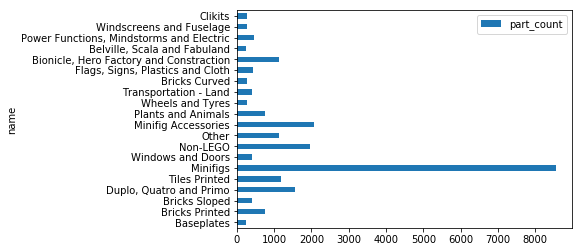

In [61]:
#2
#Plot the distribution of part categories as a (horizontal) bar chart. 
#Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).

#get the top 20 part categories from the parts dataframe
top_cat_ids = parts\
                .groupby('part_cat_id')\
                .part_cat_id.count()\
                .sort_values(ascending=False)\
                .head(20)\
                .to_frame('part_count')

#merge with the part_categories dataframe to get the names of the categories 
top_categories = pd.merge(part_categories, top_cat_ids, left_on='id', right_on='part_cat_id').set_index('id')

#plot
top_categories.plot(kind='barh', x='name')



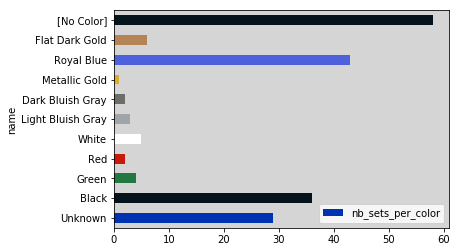

In [62]:
#3
#Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. 
#Color each bar with the respective color that it represents.

#get the most common color id of an inventory id from the inventory_parts set 
inv_id_with_max_color = inventory_parts \
    .drop(['is_spare', 'part_id'], axis = 1) \
    .groupby(['inventory_id', 'color_id']).sum()\
    .sort_values(['inventory_id', 'quantity'], ascending=False)\
    .groupby(['inventory_id']).head(1)\
    .drop(['quantity'], axis = 1)\
    .reset_index()

#merge with the inventory_sets dataframe to count the color id with the most sets
set_count_per_color_id = pd.merge(inv_id_with_max_color, inventory_sets)\
    .drop(['inventory_id','quantity'], axis = 1)\
    .groupby(['color_id']).count()\
    .reset_index()\
    .rename(columns={'set_id':'nb_sets_per_color', 'color_id': 'id'})


#merge with the colors dataframe to get the rgb value of each color id
set_count_per_color = pd.merge(set_count_per_color_id, colors)

#add a '#' to each rgb value so the plotter can interpret it
for i in range(len(set_count_per_color)):
    set_count_per_color['rgb'][i] = '#' + set_count_per_color['rgb'][i]
    
#plot (unknown will be default blue, no color will be black)
plot = set_count_per_color.plot(kind='barh', x='name', y='nb_sets_per_color', color=set_count_per_color['rgb'])

#set the background to grey so we can see the white bar
plot.set_facecolor('#D5D5D5')

#get rid of no color and unknown



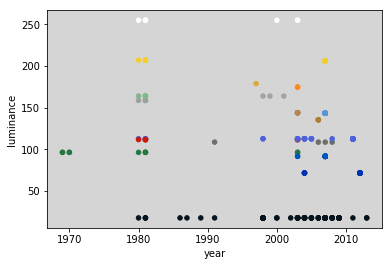

In [69]:
#4:
#Create a scatter plot of the luminance* of the sets vs their publishing year. 
#What do you observe for the years 1980-1981? How do you interpret what you see?

#map each inventory id to the most common color in it
inv_id_with_max_col = inventory_parts \
    .drop(['is_spare', 'part_id'], axis = 1) \
    .groupby(['inventory_id', 'color_id']).sum()\
    .sort_values(['inventory_id', 'quantity'], ascending=False)\
    .drop(['quantity'], axis = 1)\
    .reset_index()

#map each set id to its most common color
set_with_col = pd.merge(inv_id_with_max_col, inventory_sets)\
    .drop(['inventory_id','quantity'], axis = 1)

#add rgb values
set_with_rgb = pd.merge(set_with_col, colors, left_on='color_id', right_on='id')\
    .drop(['id', 'name', 'is_trans'], axis = 1)

#add year values
set_rgb_year = pd.merge(set_with_rgb, sets, left_on='set_id', right_on='id')\
    .drop(['name', 'theme_id', 'num_parts', 'id'], axis = 1)

#create column to store luminance
set_rgb_year['luminance'] = 0.0


def compute_luminance(rgb_string):
    R = int(rgb_string[0:2], 16)
    G = int(rgb_string[2:4], 16)
    B = int(rgb_string[4:6], 16)
    return np.sqrt(0.299*R*R + 0.587*G*G + 0.114*B*B)

#fill in luminance column
for i in range(len(set_rgb_year)):
    set_rgb_year['luminance'][i] = compute_luminance(set_rgb_year['rgb'][i])
    set_rgb_year['rgb'][i] = '#' + set_rgb_year['rgb'][i]
    
#convert years to numbers (remember these have already been cleaned)
set_rgb_year[['year']] = set_rgb_year[['year']].apply(pd.to_numeric)

#plot
scatterplot = set_rgb_year.plot(kind='scatter', x = 'year', y = 'luminance', color=set_rgb_year['rgb'])

#set grey background so white dots are visible
scatterplot.set_facecolor('#D5D5D5')

#1980 and 1981 are identical: two theories
#1) The data for 1981 was lost and 1980 was simply copied to replace it (or one year was unintentionally overwritten)
#2) We parsed '80s' to 1980, but perhaps it meant 1981 instead



__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [70]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [71]:
# Write your code here
bikes = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json.zip', compression='zip').copy()

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [73]:
###### Write your code here

#Helper function that checks if a column should have a datetime in it based on its name
def isDatetime(col_name):
    return 'Time' in col_name

#helper function to print detailed information about a dataframe
def print_info_long(frame):
    print('Info Long-------------------------------------------')
    for column in frame:
        #print column name
        print(str(column) + ': ')
        #print type
        elem_type = frame[column].dtype.name
        print('Type: ' + str(elem_type))
        
        #print range, depending on type
        print('Range: {')
        #datetime: print earliest and latest date
        if isDatetime(column):
            dates = pd.to_datetime(frame[column])    
            print(str(min(dates)) + ' - ' + str(max(dates)))
            
        #object or category: print all possible values
        elif elem_type == 'object' or elem_type == 'category':
            unique_elems = set(frame[column])
            for elem in unique_elems:
                print(elem)
        
        #other: print smallest and biggest
        else:
            print( str(frame[column].min()) + ' - ' + str(frame[column].max()))
            
        print('}')
        print(' ')
        
    #print shape
    print('Shape: ' + str(frame.shape))
    print(' ')

#helper function to print summary information about a dataframe
def print_info_short(frame):
    print('Info Short-------------------------------------------')
    for column in frame:
        #print column names
        print(str(column) + ': ')
        #print type of data in column
        elem_type = frame[column].dtype.name
        print('Type: ' + str(elem_type))
        print(' ')
    #print shape
    print('Shape: ' + str(frame.shape))
    print(' ')
    
        
print_info_long(bikes)

#Categorical: set to type "category"
#Passholder type
bikes['Passholder Type'] = bikes['Passholder Type'].astype('category')
#Trip Route Category
bikes['Trip Route Category'] = bikes['Trip Route Category'].astype('category')

print_info_long(bikes)


Info Long-------------------------------------------
Bike ID: 
Type: float64
Range: {
1349.0 - 6728.0
}
 
Duration: 
Type: int64
Range: {
60 - 86400
}
 
End Time: 
Type: object
Range: {
2016-07-07 04:20:00 - 2017-04-02 10:32:00
}
 
Ending Station ID: 
Type: float64
Range: {
3000.0 - 4108.0
}
 
Ending Station Latitude: 
Type: float64
Range: {
0.0 - 34.0642815
}
 
Ending Station Longitude: 
Type: float64
Range: {
-118.472832 - 0.0
}
 
Passholder Type: 
Type: category
Range: {
Monthly Pass
Staff Annual
Flex Pass
Walk-up
}
 
Plan Duration: 
Type: float64
Range: {
0.0 - 365.0
}
 
Start Time: 
Type: object
Range: {
2016-07-07 04:17:00 - 2017-03-31 23:45:00
}
 
Starting Station ID: 
Type: float64
Range: {
3000.0 - 4108.0
}
 
Starting Station Latitude: 
Type: float64
Range: {
0.0 - 34.0642815
}
 
Starting Station Longitude: 
Type: float64
Range: {
-118.472832 - 0.0
}
 
Trip ID: 
Type: int64
Range: {
1912818 - 23794218
}
 
Trip Route Category: 
Type: category
Range: {
One Way
Round Trip
}
 
Sha

In [74]:
#Redundancies: Pitfall: if one value changes, the other not: inconsistency

#Redundancy: Station id <-> longitude + latitude : we only keep station ids and move lon/lat to separate table

#get the ids, longitudes and latitiudes of starting stations
start_stations = bikes[['Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude']
                      ].copy().drop_duplicates()
start_stations_renamed = start_stations.rename(columns={'Starting Station ID': 'Station ID', 
                         'Starting Station Latitude': 'Latitude', 
                         'Starting Station Longitude':'Longitude'})

#get the ids, longitudes and latitiudes of ending stations
end_stations = bikes[['Ending Station ID', 'Ending Station Latitude', 'Ending Station Longitude']
                    ].copy().drop_duplicates()

end_stations_renamed = end_stations.rename(columns={'Ending Station ID': 'Station ID', 
                         'Ending Station Latitude': 'Latitude', 
                         'Ending Station Longitude':'Longitude'})

#join the starting and ending stations to one dataframe
stations = pd.merge(start_stations_renamed, end_stations_renamed).drop_duplicates()

#Redundancy: Passholder type <-> Plan Duration: we only keep passholder types
plan_durations = bikes[['Passholder Type', 'Plan Duration']].copy().drop_duplicates()

##Redundancy: Round trip: Start station ID = End station ID/ One way: Start station ID != End station ID: 
#we extract the trip route category
trip_routes = bikes[['Ending Station ID', 'Starting Station ID', 'Trip Route Category']].copy().drop_duplicates()

#Duration <-> End time - Start time in seconds: we extract the end time
durations = bikes[['Start Time', 'End Time', 'Duration']].copy().drop_duplicates()


In [75]:
print_info_short(stations)
print_info_short(plan_durations)
print_info_short(trip_routes)
print_info_short(durations)

Info Short-------------------------------------------
Station ID: 
Type: float64
 
Latitude: 
Type: float64
 
Longitude: 
Type: float64
 
Shape: (129, 3)
 
Info Short-------------------------------------------
Passholder Type: 
Type: category
 
Plan Duration: 
Type: float64
 
Shape: (5, 2)
 
Info Short-------------------------------------------
Ending Station ID: 
Type: float64
 
Starting Station ID: 
Type: float64
 
Trip Route Category: 
Type: category
 
Shape: (3703, 3)
 
Info Short-------------------------------------------
Start Time: 
Type: object
 
End Time: 
Type: object
 
Duration: 
Type: int64
 
Shape: (125912, 3)
 


In [76]:
#Drop values stored in other tables
bikes.drop(['Trip Route Category'], axis = 1, inplace = True)
bikes.drop(['Plan Duration'], axis = 1, inplace = True)
bikes.drop(['Starting Station Latitude', 
            'Starting Station Longitude', 
            'Ending Station Latitude', 
            'Ending Station Longitude'], axis = 1, inplace = True)
bikes.drop(['End Time'], axis = 1, inplace = True)
print_info_short(bikes)

Info Short-------------------------------------------
Bike ID: 
Type: float64
 
Duration: 
Type: int64
 
Ending Station ID: 
Type: float64
 
Passholder Type: 
Type: category
 
Start Time: 
Type: object
 
Starting Station ID: 
Type: float64
 
Trip ID: 
Type: int64
 
Shape: (132427, 7)
 


__\* Briefly explain your approach here \*__
Explained in code subsets

# B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

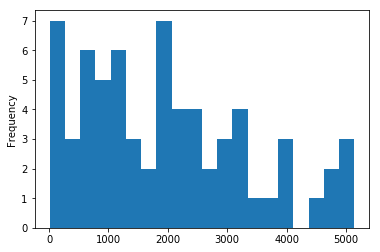

In [82]:
# Write your code here
#1
#Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins 
#(Hint: each bin describes a range of counts, not stations).

#Get the outgoing stations
outgoing_trip_per_station = bikes['Starting Station ID'].to_frame()
#Column countind number of leaving trips
outgoing_trip_per_station['Outgoing'] = 1
#sum leaving trips by station
outgoing_trips = outgoing_trip_per_station.groupby('Starting Station ID').sum().reset_index()
#sort the outgoing trip numbers
outgoing = outgoing_trips['Outgoing'].sort_values()

#plot
outgoing.plot(kind='hist', bins= 20)


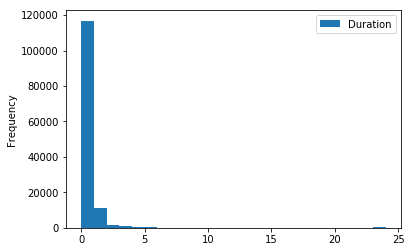

In [85]:
#2
#Plot histograms for the duration and (trip starting hour in the day) attributes. 
#For both the duration and the trip starting hour use discrete 1-hour intervals. 
#What do you observe in each plot? What are some popular values in the duration plot? 
#Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.

#Duration attribute
durations_count = bikes['Duration'].to_frame()

#round Durations from seconds to hours
length = len(durations_count['Duration'])
for i in range(length):
    duration_seconds = durations_count['Duration'][i]
    duration_hours = duration_seconds/(60 * 60)
    durations_count['Duration'][i] = round(duration_hours)

#plot
durations_count.plot(kind='hist', bins=24)

#Observations: 
# 1) the most popular duration by far is one hour, then two -> people rent bikes mostly for short trips
# 2) Small spike at 24 -> people who took the bike the entire day (for example went home with it for the night)

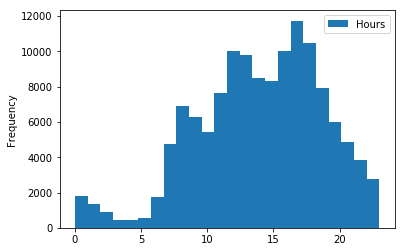

In [86]:
#Starting hour attribute
starting_hours = bikes['Start Time'].to_frame()

#Helper to extract hours from datetimes 
def get_hours(df, column):
    df['Hours'] = 0;
    nb_dates = len(df[column])
    for i in range(nb_dates):
        df['Hours'][i] = pd.to_datetime(df[column][i]).hour

get_hours(starting_hours, 'Start Time')

#plot
starting_hours['Hours'].to_frame().plot(kind='hist', bins=24)

#Observations:
# 23:00 - 06:00: few bikes rented -> people are sleeping, or do not want to bike in the dark
# 07:00 - 09:00: first spike -> people going to school or work
# 10:00 - 11:00: local minimum -> people stay at school/work
# 11:00 - 13:00: second, higher spike -> people going to and from lunch
# 14:00 - 15:00: local minimum -> people back at school/work
# 16:00 - 18:00: biggest spike -> people leaving school and work to go home 
#(especially school: kids and teenagers are more likely to use bikes in the afternoon, when they are full of energy,
#than in the morning)
# 19:00 - 23:00: progressive drop-off as people return home and go to sleep

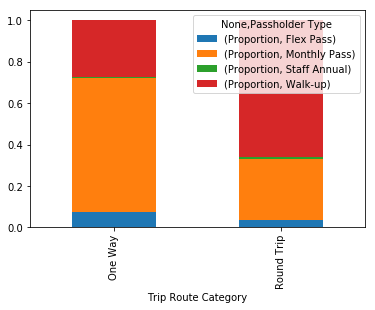

In [87]:
#3
#For each trip route category, calculate the proportion of trips by passholder type and present your results 
#in a stacked bar chart with normalized height.

#get data for use in two different dataframes, one for the proportion and one for the overall values
df_count = pd.merge(bikes, trip_routes)[['Passholder Type', 'Trip Route Category']].copy()
df_total = pd.merge(bikes, trip_routes)[['Trip Route Category']].copy()

#Get the number of trips by passholder type
df_count['Count'] = 1
trips_by_pass = df_count.groupby(['Trip Route Category', 'Passholder Type']).sum().reset_index()

#Get the total numer of trips
df_total['Total'] = 1
total_by_trip = df_total.groupby('Trip Route Category').sum().reset_index()

#Calculate the normailzed proportion of trips by passholder type (nb trips by type/ total nb trips)
with_proportion = pd.merge(trips_by_pass, total_by_trip)
with_proportion['Proportion'] = 0.0

nb_combs = len(with_proportion)
for i in range(nb_combs):
    with_proportion['Proportion'][i] = with_proportion['Count'][i]/ with_proportion['Total'][i]

    
#prepare dataframe for plotting
proportion = with_proportion.drop(['Count', 'Total'], axis=1).set_index(['Trip Route Category', 'Passholder Type'])

#pivot data for stacking by slices of proportion 
stacked_trips = proportion.pivot_table(values=['Proportion'], 
                      index='Trip Route Category',
                      columns='Passholder Type',
                      aggfunc='sum')

stacked_trips.plot(kind='bar', stacked=True)


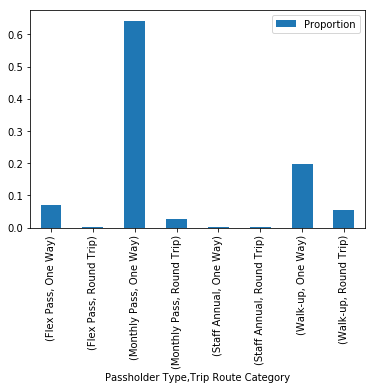

In [89]:
#4
#Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of 
#trips by passholder type and trip route category. Explain any outliers you observe.

#get trip route info from separate table
bikes_trips = pd.merge(bikes, trip_routes)

#round start time to hours
get_hours(bikes_trips, 'Start Time')

#filter to only trips starting before noon
bikes_trips_2 = bikes_trips[bikes_trips['Hours'] < 12][['Passholder Type', 'Trip Route Category']]\
    .set_index(['Passholder Type', 'Trip Route Category'])

#Count the number of trips by passholder type and trip route category
bikes_trips_2['Count'] = 1.0
bikes_trips_3 = bikes_trips_2.groupby(['Passholder Type', 'Trip Route Category']).count()

#Get the total number of trips
total = bikes_trips_3['Count'].sum()

#calculate and store the proportion of trips by passholder type and trip route category
bikes_trips_3['Proportion'] = 0.0
length = len(bikes_trips_3['Count'])

for i in range(length):
    count = bikes_trips_3['Count'][i]
    bikes_trips_3['Proportion'][i] = count/total
    
    
#plot
bikes_trips_3.drop('Count', axis=1).plot(kind='bar')

#Outliers:
# 1) The vast majority of trips are one-way on a monthly pass: people go from one station to another every day,
# but not back. This is consistent with the chart showing starting times (mostly afternoon), suggesting people use 
# bikes mostly to travel at certain times of day 
#(so they are only doind one-way trips, for example from work/school to home in the afternoon)

# 2) Staff either represents very few people, or they never use the bikes themselves

In [90]:
#5
#Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the 
#stations. For each of the two intervals calculate the proportion of trips by passholder type and trip route category. 
#Present your results in a DataFrame which has a unique, non-composite index. Does the proportion of trips depend 
#on whether it is the first or second hour interval? Would the company have any significant benefit by creating a 
#more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on 
#the second one? Assume that the number of trips per interval will not change if the scheme changes.

#Reuse the dataframe from exercice 4, where the hours are already calculated
pass_trip_hours = bikes_trips[['Bike ID', 'Passholder Type', 'Trip Route Category', 'Hours']].copy()

#get two intevalls (found by trial and error): best division time: 15:00
pass_trip_hours_early = pass_trip_hours[pass_trip_hours['Hours'] < 15].copy()
pass_trip_hours_late = pass_trip_hours[pass_trip_hours['Hours'] >= 15].copy()
print("Early: " + str(len(pass_trip_hours_early['Hours'])))
print("Late: " + str(len(pass_trip_hours_late['Hours'])))


#Parse a column which gives the intervall
total_len = len(pass_trip_hours['Bike ID'])
pass_trip_hours['Intervall'] = 0

for i in range(total_len):
    if pass_trip_hours['Hours'][i] < 15:
        pass_trip_hours['Intervall'][i] = 1
    else:
        pass_trip_hours['Intervall'][i] = 2
        

#Calculate the proportion of trips by passholder type and trip route category for each intervall
pass_trip_hours['Count'] = 1.0
pass_trip_hours_2 = pass_trip_hours.groupby(['Intervall', 'Passholder Type', 'Trip Route Category']).count().reset_index()


pass_trip_hours_2['Proportion'] = 0.0
total_intervall_1 = len(pass_trip_hours_early['Bike ID'])
total_intervall_2 = len(pass_trip_hours_late['Bike ID'])

length = len(pass_trip_hours_2['Bike ID'])

for i in range(length):
    count = pass_trip_hours_2['Count'][i]
    if pass_trip_hours_2['Intervall'][i] == 1:
        pass_trip_hours_2['Proportion'][i] = pass_trip_hours_2['Count'][i]/total_intervall_1
    else:
         pass_trip_hours_2['Proportion'][i] = pass_trip_hours_2['Count'][i]/total_intervall_2
            
#Drop useless intermediary columns
pass_trip_hours_2.drop(['Hours', 'Count'], axis=1)

#Analysis:
#There is never a significant difference between intervalls 1 and 2
#Intervall 1 is always slightly larger because more of the trips fall into this category in general (66560 > 65952)
# Therefore, the company could as a whole charge slightly more for bikes rented before 15:00

Early: 66560
Late: 65952


Intervall Passholder Type Trip Route Category  Bike ID  Proportion
0           1       Flex Pass             One Way     4626    0.069501
1           1       Flex Pass          Round Trip      268    0.004026
2           1    Monthly Pass             One Way    39369    0.591481
3           1    Monthly Pass          Round Trip     2064    0.031070
4           1    Staff Annual             One Way      182    0.002749
5           1    Staff Annual          Round Trip       56    0.000886
6           1         Walk-up             One Way    15798    0.237380
7           1         Walk-up          Round Trip     4185    0.062906
8           2       Flex Pass             One Way     4416    0.066958
9           2       Flex Pass          Round Trip      215    0.003260
10          2    Monthly Pass             One Way    38170    0.578754
11          2    Monthly Pass          Round Trip     1706    0.025867
12          2    Staff Annual             One Way      116    0.001759
13          2    Staff Annual          Round Trip       24    0.000364
14          2         Walk-up             One Way    17044    0.258430
15          2         Walk-up          Round Trip     4261    0.064608

__\* Briefly explain your approach for every query here \*__
Explained in code subsets